In [319]:
import tellurium as te; te.setDefaultPlottingEngine('matplotlib')
import matplotlib.pyplot as plt
%matplotlib inline

In [413]:
model = '''
#functions # q: 1 fuer act, 0 fuer rep

#allgemeine funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function regfunc(U ,K ,H, q)
   ( (U/K)^H * q + 1*(1-q)) / (1 + (U/K)^H )
end

#allgemeine GateAND funktion
function gateand(U1, K1, U2, K2, H, q1, q2)
    ( regfunc(U1, K1, H, q1) ) * ( regfunc(U2, K2, H, q2))
end

#allgemeine GateOR funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function gar(U, Ku, V, Kv, H, q)
    ( (U/Ku)^H * q + 1 * (1-q) ) / ( 1+ (U/Ku)^H + (V/Kv)^H )
end

#allgemeine GateOR funktion
function gateor(U1, Ku, V1, Kv, H, q1, q2)
    gar(U1, Ku, V1, Kv, H, q1) + gar(V1, Kv, U1, Ku, H, q2)
end

#allgemeines bla
function fbla(K1)
      ((1/K1)^2)  /  (1 + (1/K1)^2)
end

#allgemeiner normand
function funormand(K1, K2, K3)
    (1/K2)^2  /  (1 + (1/K2)^2) *  (fbla(K1) /K3)^2  /  (1 + (fbla(K1) /K3)^2) 
end

X = 1
Z = 0
Y = 0

Sx = 0
Sy = 1
By = 0
Bz = 0
by = 1
bz = 1
ay = 1
az = 1

X1 := Sx * X
Y1 := Sy * Y

H = 2;
j=0;




#PFEILE. 1 fuer act, 0 fuer rep. P1: XnachY , P2: XnachZ, P3: YnachZ
P1 = 1
P2 = 1
P3 = 1

Kxy = 0.1
Kxz = 0.5
Kyz = 0.1



#Normierung

bla = (By + by *    fbla(Kxy) )  / ay
normand =  (Bz + bz * funormand(Kxy, Kxz, Kyz))/az



#ODE

Y'= ( By + by * regfunc(X1, Kxy, H, P1) - ay * Y ) 
Z'= ( Bz + bz * gateand(X1, Kxz, Y1, Kyz, H, P2, P3) - az * Z )
#Z' = Bz + bz * gateor(X1, Kxz, Y1, Kyz, H, P2, P3) - az * Z

Z2: = Z / normand



#simple regulation

R = 1
S = 1
T = 0

SSx = 1
SSy = 1
By = 0
Bz = 0
by = 1
bz = 1
ay = 1
az = 1

SX1 := Sx * R
SY1 := Sy * S

H = 2;

SKxy = 0.1
SKxz = 1
SKyz= 0.1


Sbla = (By + by *    fbla(SKxy) )  / ay
Snormand= (Bz + bz * funormand(SKxy, SKxz, SKyz))/az

S' = 0
T' = (Bz + bz * gateand(SX1, SKxz, SY1, SKyz, H, P2, P3) - az * T ) 

T2 := T / (Snormand)

t1=0
t2=1
t3=4
E1: at (time>t1): Sx = 0;
E2: at (time>t2): Sx = 1;
E3: at (time>t3): Sx = 0; 

'''


In [434]:
#combi 1+2

start = 0
end = 7
steps = 1000


r=te.loada(model)

r.reset()
r['t2']=1
r['t3']=4

r['P1']=1
r['P2']=1
r['P3']=1

r['Kxy']=0.1
r['Kyz']=0.5
r['Kxz']=0.1

r['SKxy']=0.1
r['SKyz']=1
r['SKxz']=0.1

r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T',  'Z2', 'T2']
res = r.simulate(start, end, steps)
plt.figure(1)
print(r.normand)

fig, axes = plt.subplots(0,1)

ax1=axes[1]
plt.title('Incoherent Type 1 AND')
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
axes[0][0].plot(res['time'], res['Sx'],'--',color='orange')
axes[0][0].plot(res['time'], res['Z2'], linewidth=5, color='blue')
axes[0][0].plot(res['time'], res['T2'], linewidth=1, color='black')

r.reset()
r['Kxy']=0.1
r['Kyz']=5
r['Kxz']=0.1


r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T',  'Z2', 'T2']
res=r.simulate(start, end, steps)
axes[0][0].plot(res['time'], res['Z2'], linewidth=3, color='green')
print(r.normand)



start = 0
end = 7
steps = 1000

r=te.loada(model)
r.reset()
r['P1']=0
r['P2']=1
r['P3']=0

r['Kxy']=0.1
r['Kyz']=0.6
r['Kxz']=0.1
r['SKxy']=0.1
r['SKyz']=1
r['SKxz']=0.1
#r['t2']=3
#r['t3']=10

plt.figure(3)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T', 'Z2', 'T2', 'bla', 'normand', 'Snormand', 'Sbla']
res = r.simulate(start, end, steps)
axes[0][1].plot.plot(res['time'], res['Sx'],'--',color='orange')
axes[0][1].plot(res['time'], res['Z2'], linewidth=5, color='blue')
axes[0][1].plot(res['time'], res['T2'], linewidth=1, color='black')




r.reset()
r['Kyz']=0.3

res2=r.simulate(start, end, steps)
axes[1].plot(res2['time'], res2['Z2'], linewidth=3, color='green')



axes[1].set_title('Incoherent Type 1 AND')
plt.legend()
plt.tight_layout()

0.79192160768


IndexError: index 1 is out of bounds for axis 0 with size 0

0.79192160768
0.788907798571


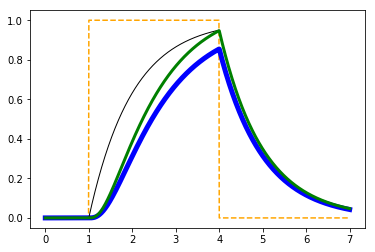

In [423]:
# COHERENT 1 AND

start = 0
end = 7
steps = 1000


r=te.loada(model)

r.reset()
r['t2']=1
r['t3']=4

r['P1']=1
r['P2']=1
r['P3']=1

r['Kxy']=0.1
r['Kyz']=0.5
r['Kxz']=0.1

r['SKxy']=0.1
r['SKyz']=1
r['SKxz']=0.1

r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T',  'Z2', 'T2']
res = r.simulate(start, end, steps)
plt.figure(1)
print(r.normand)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z2'], linewidth=5, color='blue')
plt.plot(res['time'], res['T2'], linewidth=1, color='black')

r.reset()
r['Kxy']=0.1
r['Kyz']=0.4
r['Kxz']=0.1


r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T',  'Z2', 'T2']
res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z2'], linewidth=3, color='green')
print(r.normand)


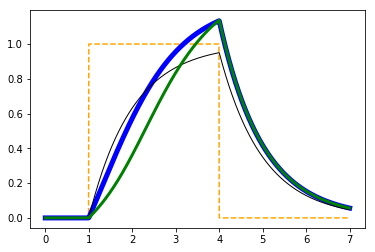

In [417]:
# COHERENT 4 AND

start = 0
end = 7
steps = 1000

r=te.loada(model)
r.reset()
r['P1']=0
r['P2']=1
r['P3']=0

r['Kxy']=0.1
r['Kyz']=0.6
r['Kxz']=0.1
r['SKxy']=0.1
r['SKyz']=1
r['SKxz']=0.1
#r['t2']=3
#r['t3']=10

plt.figure(3)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T', 'Z2', 'T2', 'bla', 'normand', 'Snormand', 'Sbla']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z2'], linewidth=5, color='blue')
plt.plot(res['time'], res['T2'], linewidth=1, color='black')




r.reset()
r['Kyz']=0.3

res2=r.simulate(start, end, steps)
plt.plot(res2['time'], res2['Z2'], linewidth=3, color='green')


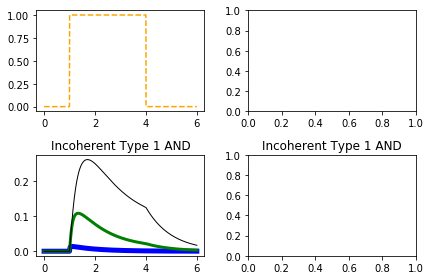

In [431]:
# INCOHERENT 1 AND Sy=1

start = 0
end = 6
steps = 1000

r=te.loada(model)

r['P1']=1
r['P2']=1
r['P3']=0

r['Kxy']=0.1
r['Kyz']=0.01
r['Kxz']=0.1


fig, axes = plt.subplots(2,2)

ax1=axes[1][0]
plt.title('Incoherent Type 1 AND')
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
axes[0][0].plot(res['time'], res['Sx'],'--',color='orange', label='Sx')
axes[1][0].plot(res['time'], res['Z'], linewidth=5, color='blue', label='Kyz=0.01')
#plt.plot(res['time'], res['T'], linewidth=1, color='black')


r.reset()
r['Kyz']=0.1
res=r.simulate(start, end, steps)
axes[1][0].plot(res['time'], res['Z'], linewidth=3, color='green', label='Kyz=0.1')

r.reset()
r['Kyz']=0.3
res=r.simulate(start, end, steps)
axes[1][0].plot(res['time'], res['Z'], linewidth=1, color='black', label='Kyz=0.3')

axes[1][0].set_title('Incoherent Type 1 AND')
plt.legend()
plt.tight_layout()


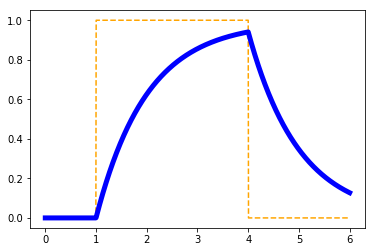

In [126]:
# INCOHERENT 1 AND Sy=0

start = 0
end = 6
steps = 1000

r=te.loada(model)

r['P1']=1
r['P2']=1
r['P3']=0

r['Kxy']=0.1
r['Kyz']=0.01
r['Kxz']=0.1


r['Sy'] = 0

plt.figure(4)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')



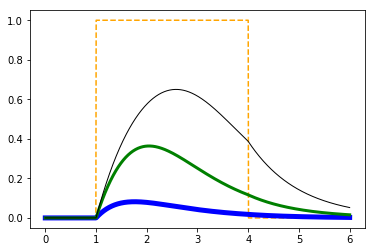

In [377]:
# INCOHERENT 4 AND Sy=1 und Sy=0

start = 0
end = 6
steps = 1000

r=te.loada(model)

r['P1']=0
r['P2']=1
r['P3']=1

r['Kxy']=0.1
r['Kyz']= 1
r['Kxz']=0.1
r['SKyz']=1


plt.figure(5)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')

r.reset()
r['Kyz']=0.3
res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'], linewidth=3, color='green')

r.reset()
r['Kyz']=0.1
res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'], linewidth=1, color='black')

#r.reset()
#r['Sy']=0
#res=r.simulate(start, end, steps)
#plt.plot(res['time'], res['Z'], linewidth=4, color='lightblue')



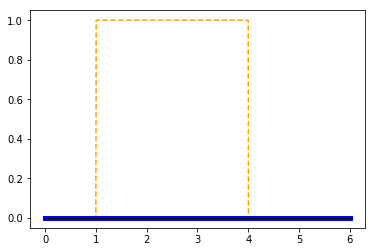

In [69]:
# INCOHERENT 4 AND Sy=0

start = 0
end = 6
steps = 1000

r=te.loada(model)

r['P1']=0
r['P2']=1
r['P3']=1

r['Kxy']=0.1
r['Kyz']= 0.1
r['Kxz']=0.1

r['SKyz']=1


r['Sy'] = 0

plt.figure(4)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')
plt.plot(res['time'], res['T'], linewidth=1, color='black')


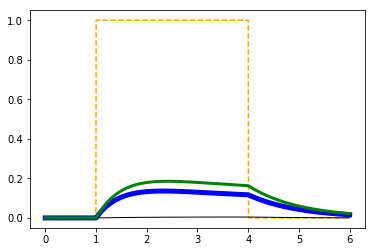

In [378]:
# INCOHERENT 1 AND WITH BASAL Y Activity

start = 0
end = 6
steps = 1000

r=te.loada(model)

r['P1']=1
r['P2']=1
r['P3']=0

r['Kxy']=1
r['Kyz']= 0.5
r['Kxz']=1

r['By']= 0.5

plt.figure(5)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')
plt.plot(res['time'], res['T'], linewidth=1, color='black')

r.reset()
r['By']=0.3

res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'], linewidth=3, color='green')



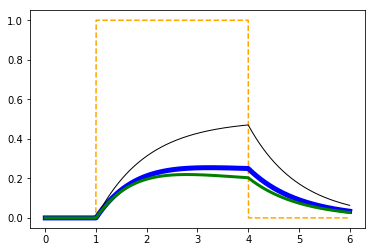

In [379]:
# INCOHERENT 1 AND WITH BASAL

start = 0
end = 6
steps = 1000

r=te.loada(model)

r['P1']=0
r['P2']=1
r['P3']=1

r['Kxy']=0.1
r['Kyz']= 0.5
r['Kxz']=1

r['By']=0.45
#r['Y'] = 1



plt.figure(6)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')
plt.plot(res['time'], res['T'], linewidth=1, color='black')

r.reset()
r['By']=0.35
res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'], linewidth=3, color='green')

In [139]:
modelOR = '''
#functions # q: 1 fuer act, 0 fuer rep

#allgemeine funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function regfunc(U ,K ,H, q)
   ( (U/K)^H * q + 1*(1-q)) / (1 + (U/K)^H )
end

#allgemeine GateAND funktion
function gateand(U1, K1, U2, K2, H, q1, q2)
    ( regfunc(U1, K1, H, q1) ) * ( regfunc(U2, K2, H, q2))
end

#allgemeine GateOR funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function gar(U, Ku, V, Kv, H, q)
    ( (U/Ku)^H * q + 1 * (1-q) ) / ( 1+ (U/Ku)^H + (V/Kv)^H )
end

#allgemeine GateOR funktion
function gateor(U1, Ku, V1, Kv, H, q1, q2)
    gar(U1, Ku, V1, Kv, H, q1) + gar(V1, Kv, U1, Ku, H, q2)
end

X = 1
Z = 0
Y = 0


Sx = 0
Sy = 1
By = 0
Bz = 0
by = 1
bz = 1
ay = 1
az = 1

X1 := Sx * X
Y1 := Sy * Y

H = 2;

Kxy = 0.1
Kxz = 0.1
Kyz = 0.5

#PFEILE. 1 fuer act, 0 fuer rep. P1: XnachY , P2: XnachZ, P3: YnachZ
P1 = 1
P2 = 1
P3 = 1

    
        
#ODE


Y'= ( By + by * regfunc(X1, Kxy, H, P1) - ay * Y ) 
#Z'= ( Bz + bz * gateand(X1, Kxz, Y1, Kyz, H, P2, P3) - az * Z ) 
Z' = Bz + bz * gateor(X1, Kxz, Y1, Kyz, H, P2, P3) - az * Z




#simple regulation

R = 1
S = 1
T = 0

SSx = 1
SSy = 1
By = 0
Bz = 0
by = 1
bz = 1
ay = 1
az = 1

SX1 := Sx * R
SY1 := Sy * S

H = 2;

SKxy = Kxy
SKxz = 1
SKyz=Kyz

S' = 0
T' = Bz + bz * gateand(SX1, SKxz, SY1, SKyz, H, P2, P3) - az * T


E1: at (time>0): Sx = 0;
E2: at (time>1): Sx = 1;
E3: at (time>4): Sx = 0;

'''


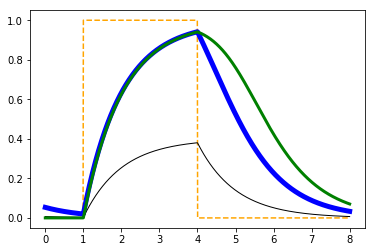

In [140]:
# COHERENT 1 OR

start = 0
end = 8
steps = 1000


r=te.loada(modelOR)

plt.figure(10)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)


r['P1']=1
r['P2']=1
r['P3']=1

r['Kxy']=0.5
r['Kyz']=0.7
r['Kxz']=0.1


r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')
plt.plot(res['time'], res['T'], linewidth=1, color='black')

r.reset()
r['Kyz']=0.3
res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'], linewidth=3, color='green')

